In [1]:
!nvidia-smi

Tue May 20 19:26:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Yolo v8 model

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
    from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Podzielenie zestawu danych

In [4]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

--2025-05-20 19:29:04--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-05-20 19:29:04 (41.5 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]



In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp -r /content/gdrive/MyDrive/GwintDataset/Polabelowane_dane /content
!mkdir -p data
!unzip -q /content/Polabelowane_dane/GWINT_signs.zip -d /content/data

Mounted at /content/gdrive


In [6]:
!python train_val_split.py --datapath="/content/data" --train_pct=0.8

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 18
Number of annotation files: 18
Images moving to train: 14
Images moving to validation: 4


In [7]:
import yaml
import os

In [8]:
def create_data_yaml(path_to_classes_txt, path_to_data_yaml):
    if not os.path.exists(path_to_classes_txt):
        print("clases.txt file not found!")
        return
    with open(path_to_classes_txt) as f:
        classes = []
        for line in f.readlines():
            if len(line.strip()) == 0: continue
            classes.append(line.strip())
        number_of_classes = len(classes)

        data = {
            'path':'data',
            'train':'train/images',
            'val':'validation/images',
            'nc': number_of_classes,
            'names': classes
        }

        with open(path_to_data_yaml, 'w') as f:
            yaml.dump(data, f, sort_keys=False)
        print("Created file")
        return
path_to_classes_txt = 'data/classes.txt'
path_to_data_yaml = 'data/data.yaml'
create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print("Created file")
!cat data/data.yaml

Created file
Created file
path: data
train: train/images
val: validation/images
nc: 12
names:
- bohater
- katapulta
- lucznik
- manekin
- miecz
- mroz
- punkty
- rog
- szpiegostwo
- wiez
- wysokie morale
- zmartwychwstanie


In [14]:
!yolo detect train data=data/data.yaml model=yolo12s.pt epochs=60 imgsz=640

100% 18.1M/18.1M [00:00<00:00, 62.3MB/s]
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

In [15]:
# path_to_model = 'C:\\Users\jakub\runs\detect'
!yolo detect predict model=runs/detect/train3/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,235,524 parameters, 0 gradients, 21.2 GFLOPs

image 1/4 /content/data/validation/images/2fd95e0c-wsparcie_lucznikow.jpg: 640x352 1 lucznik, 1 punkty, 1 szpiegostwo, 54.3ms
image 2/4 /content/data/validation/images/ab693b14-vesemir.jpg: 640x352 1 miecz, 1 punkty, 17.0ms
image 3/4 /content/data/validation/images/be740f03-vernon_roche.jpg: 640x352 1 bohater, 1 miecz, 1 punkty, 17.7ms
image 4/4 /content/data/validation/images/f3650e9f-brygada_impera1.jpg: 640x352 2 mieczs, 2 punktys, 1 wiez, 16.9ms
Speed: 2.7ms preprocess, 26.5ms inference, 40.6ms postprocess per image at shape (1, 3, 640, 352)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


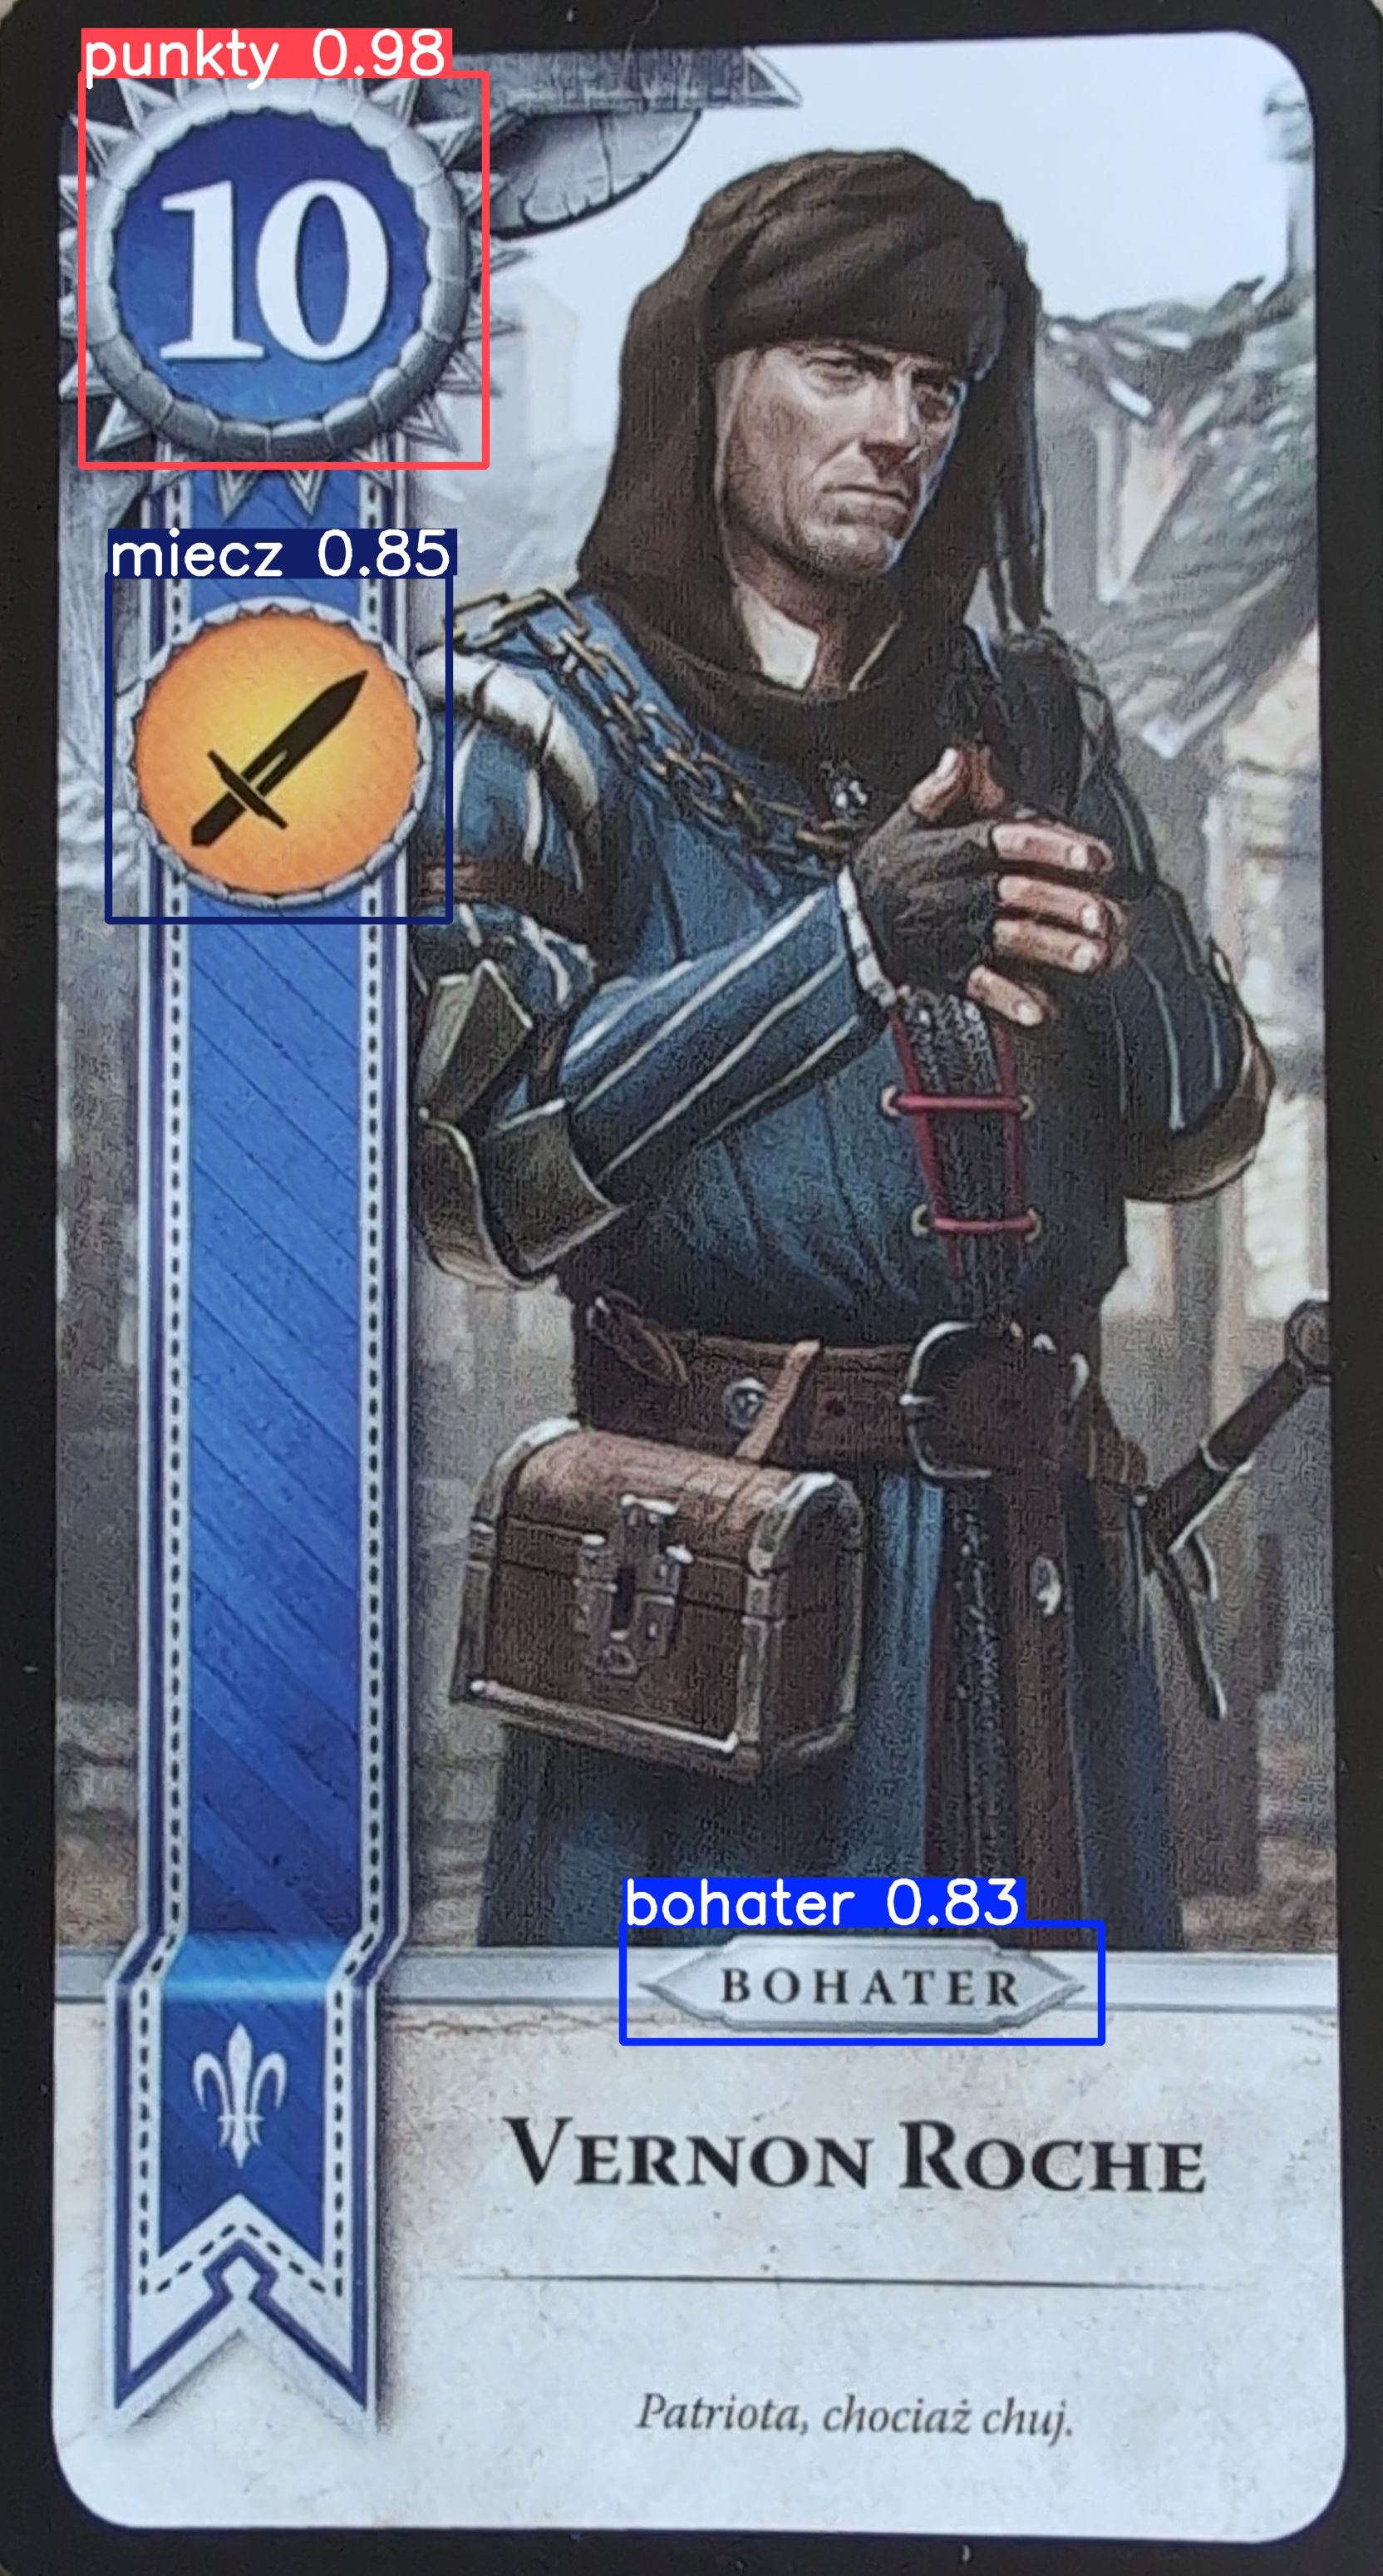

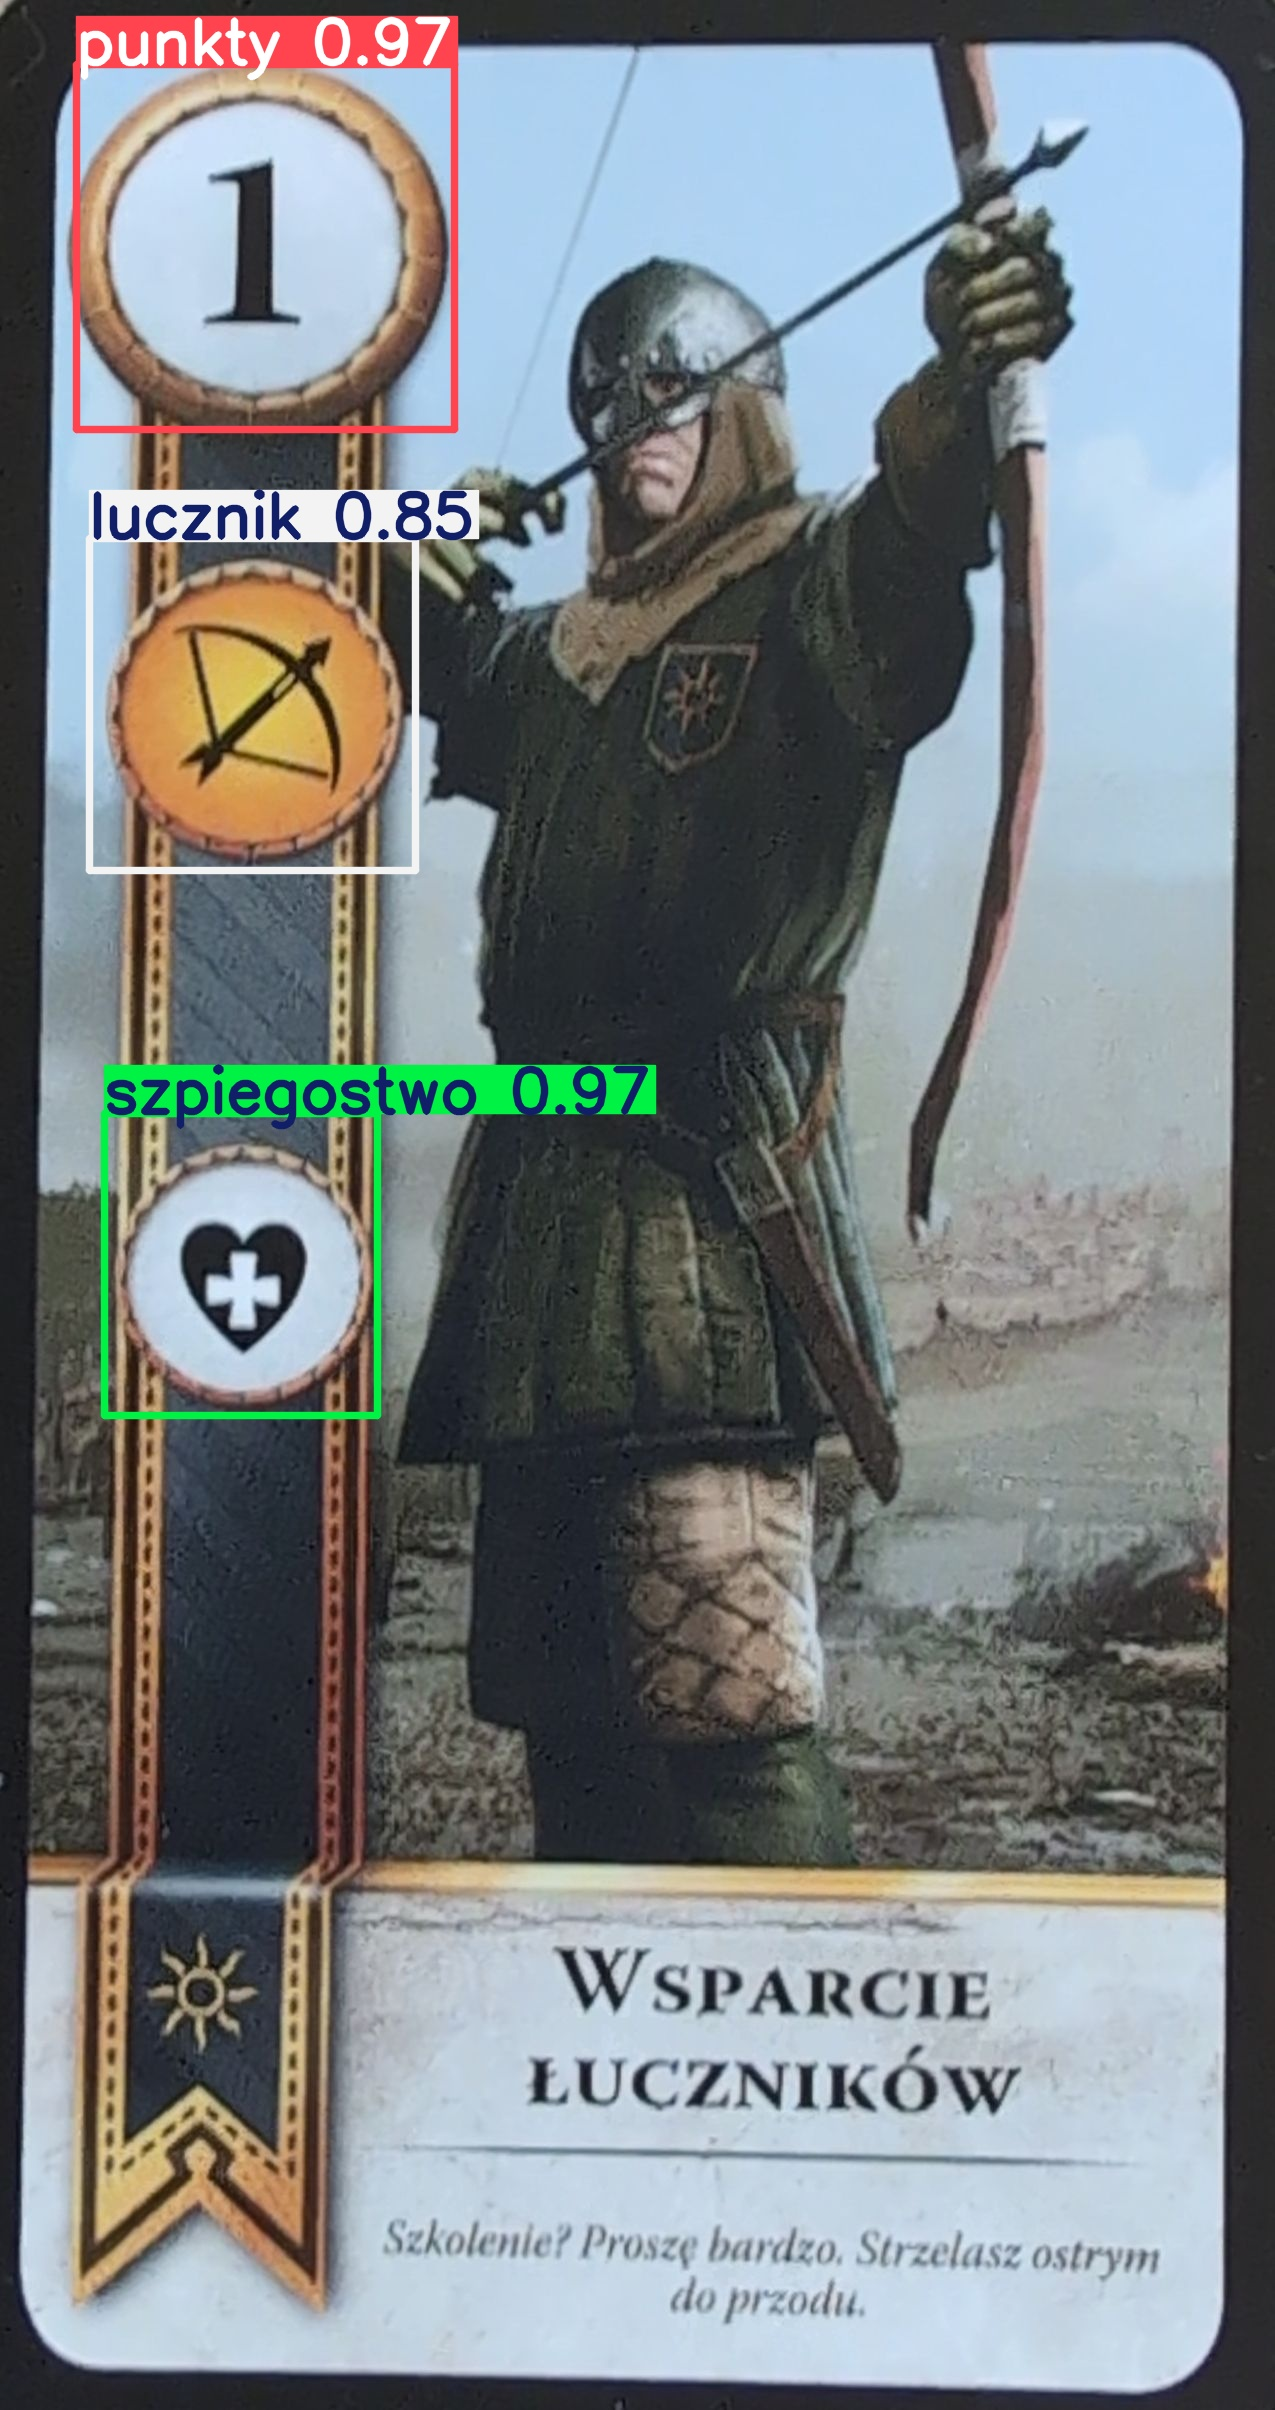

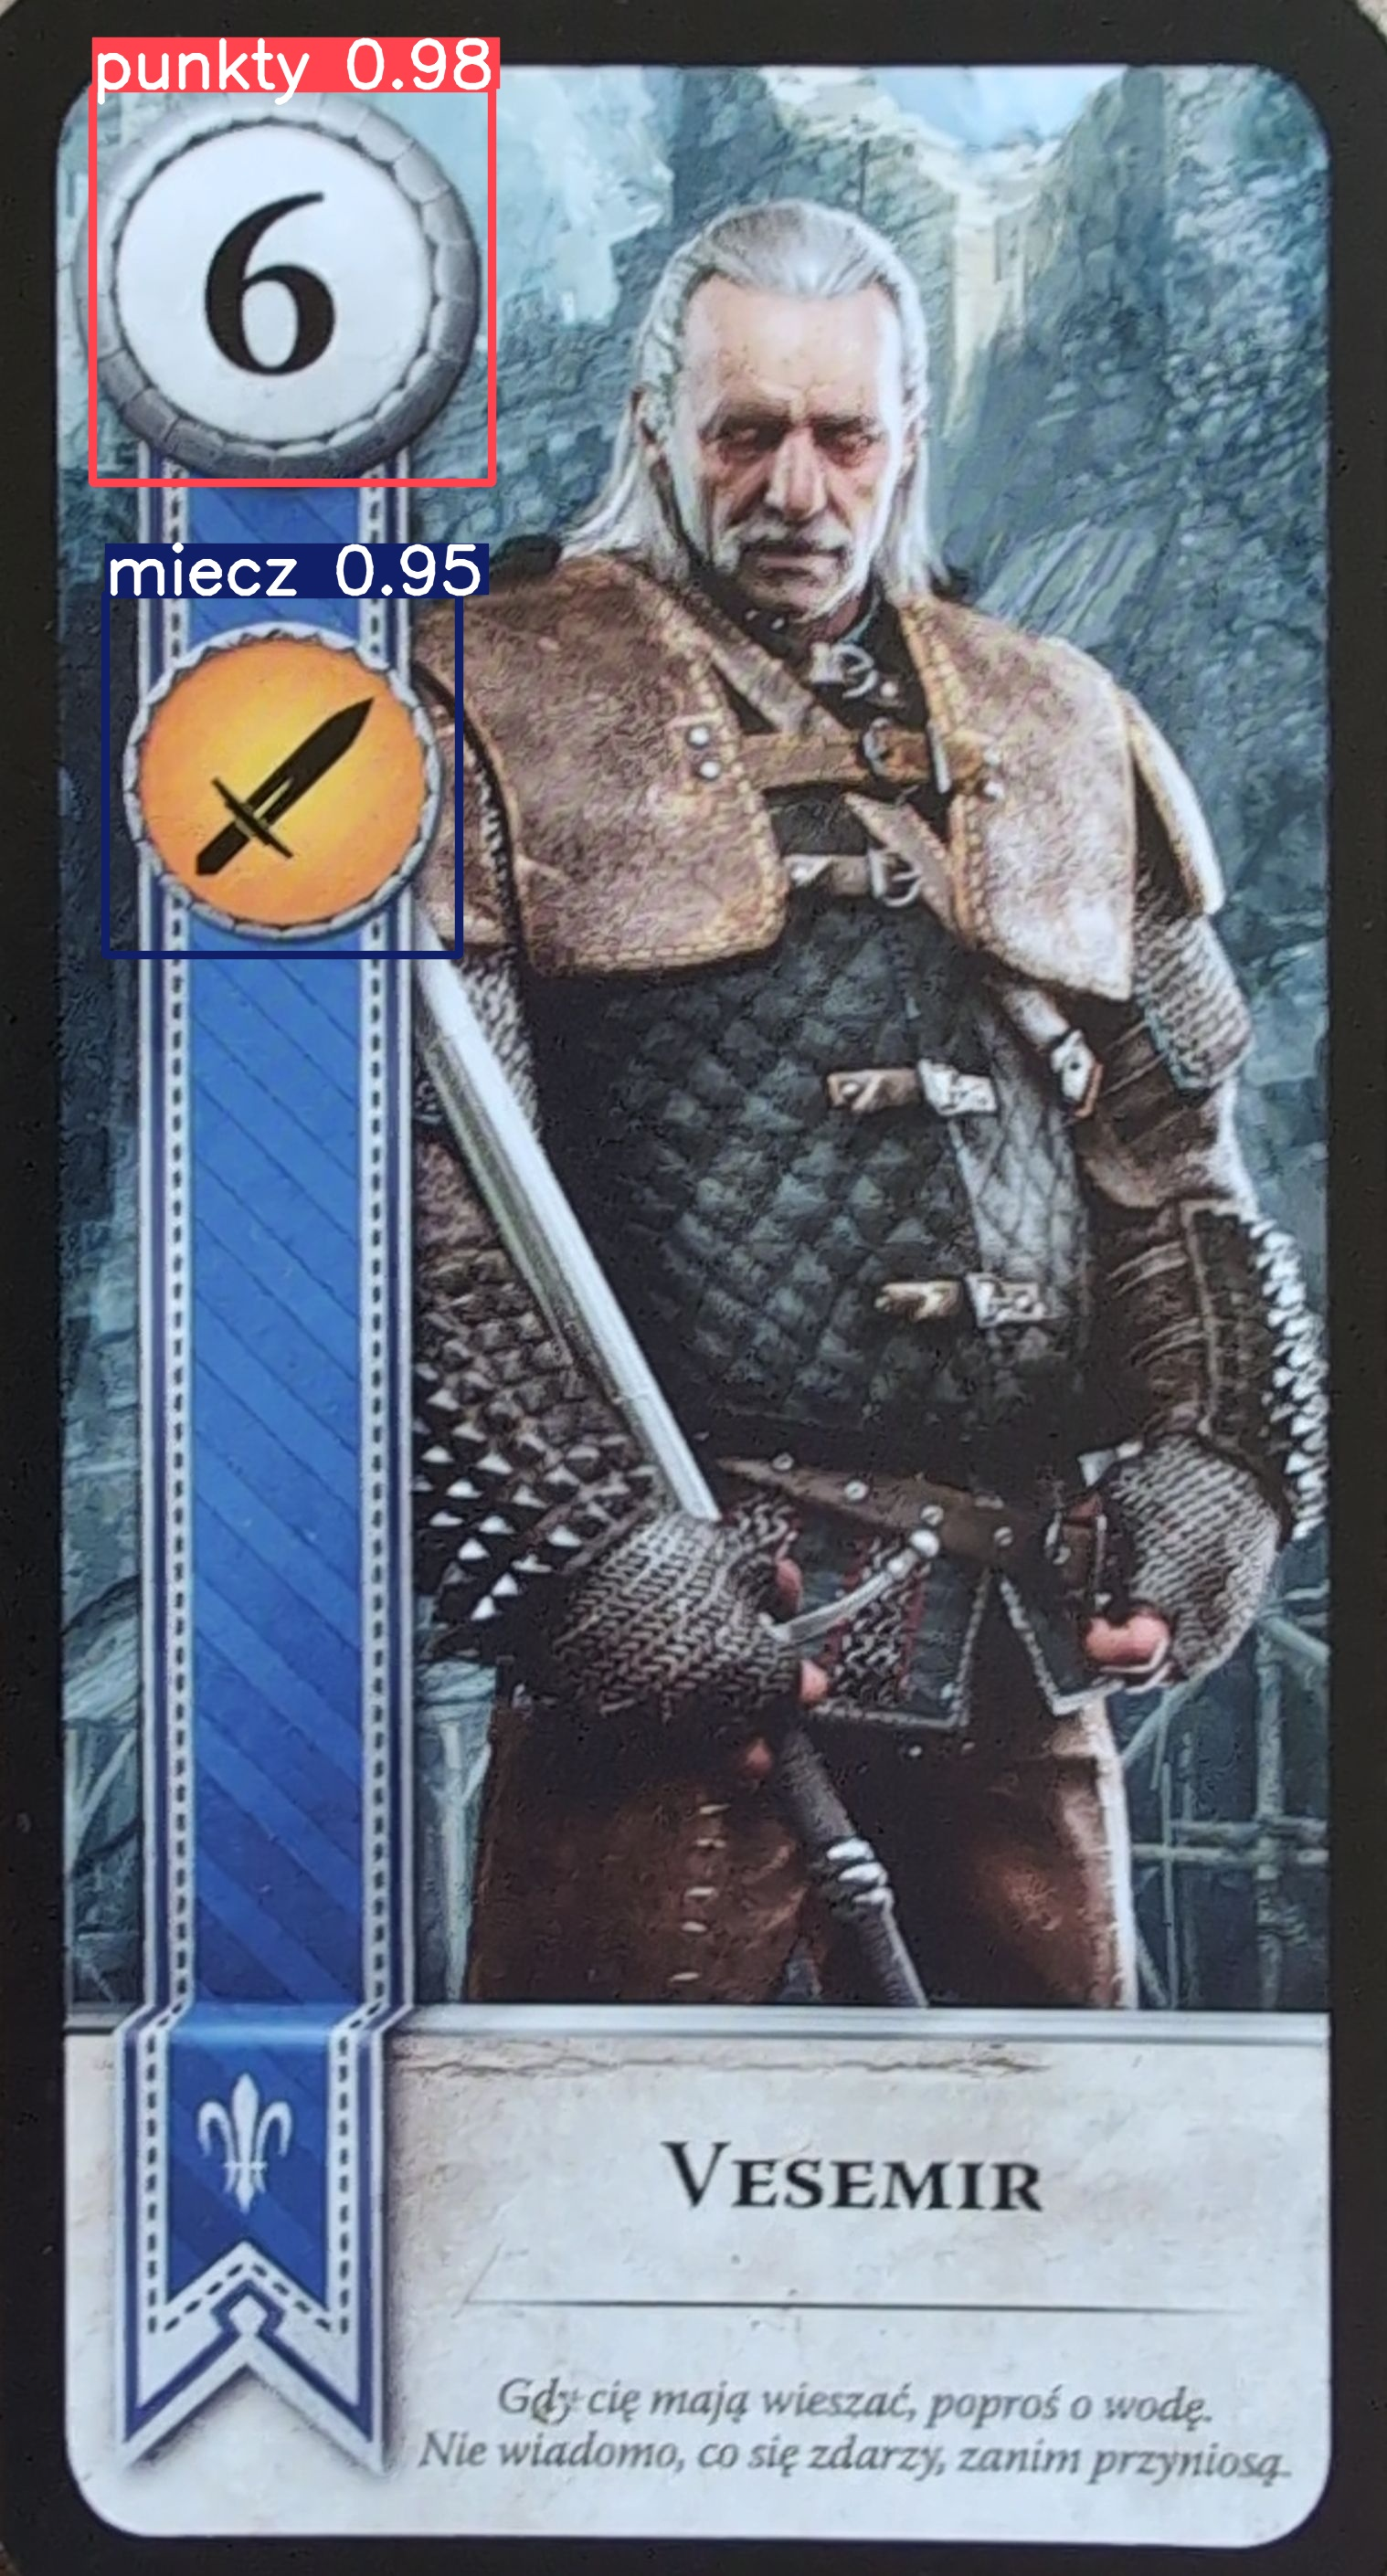

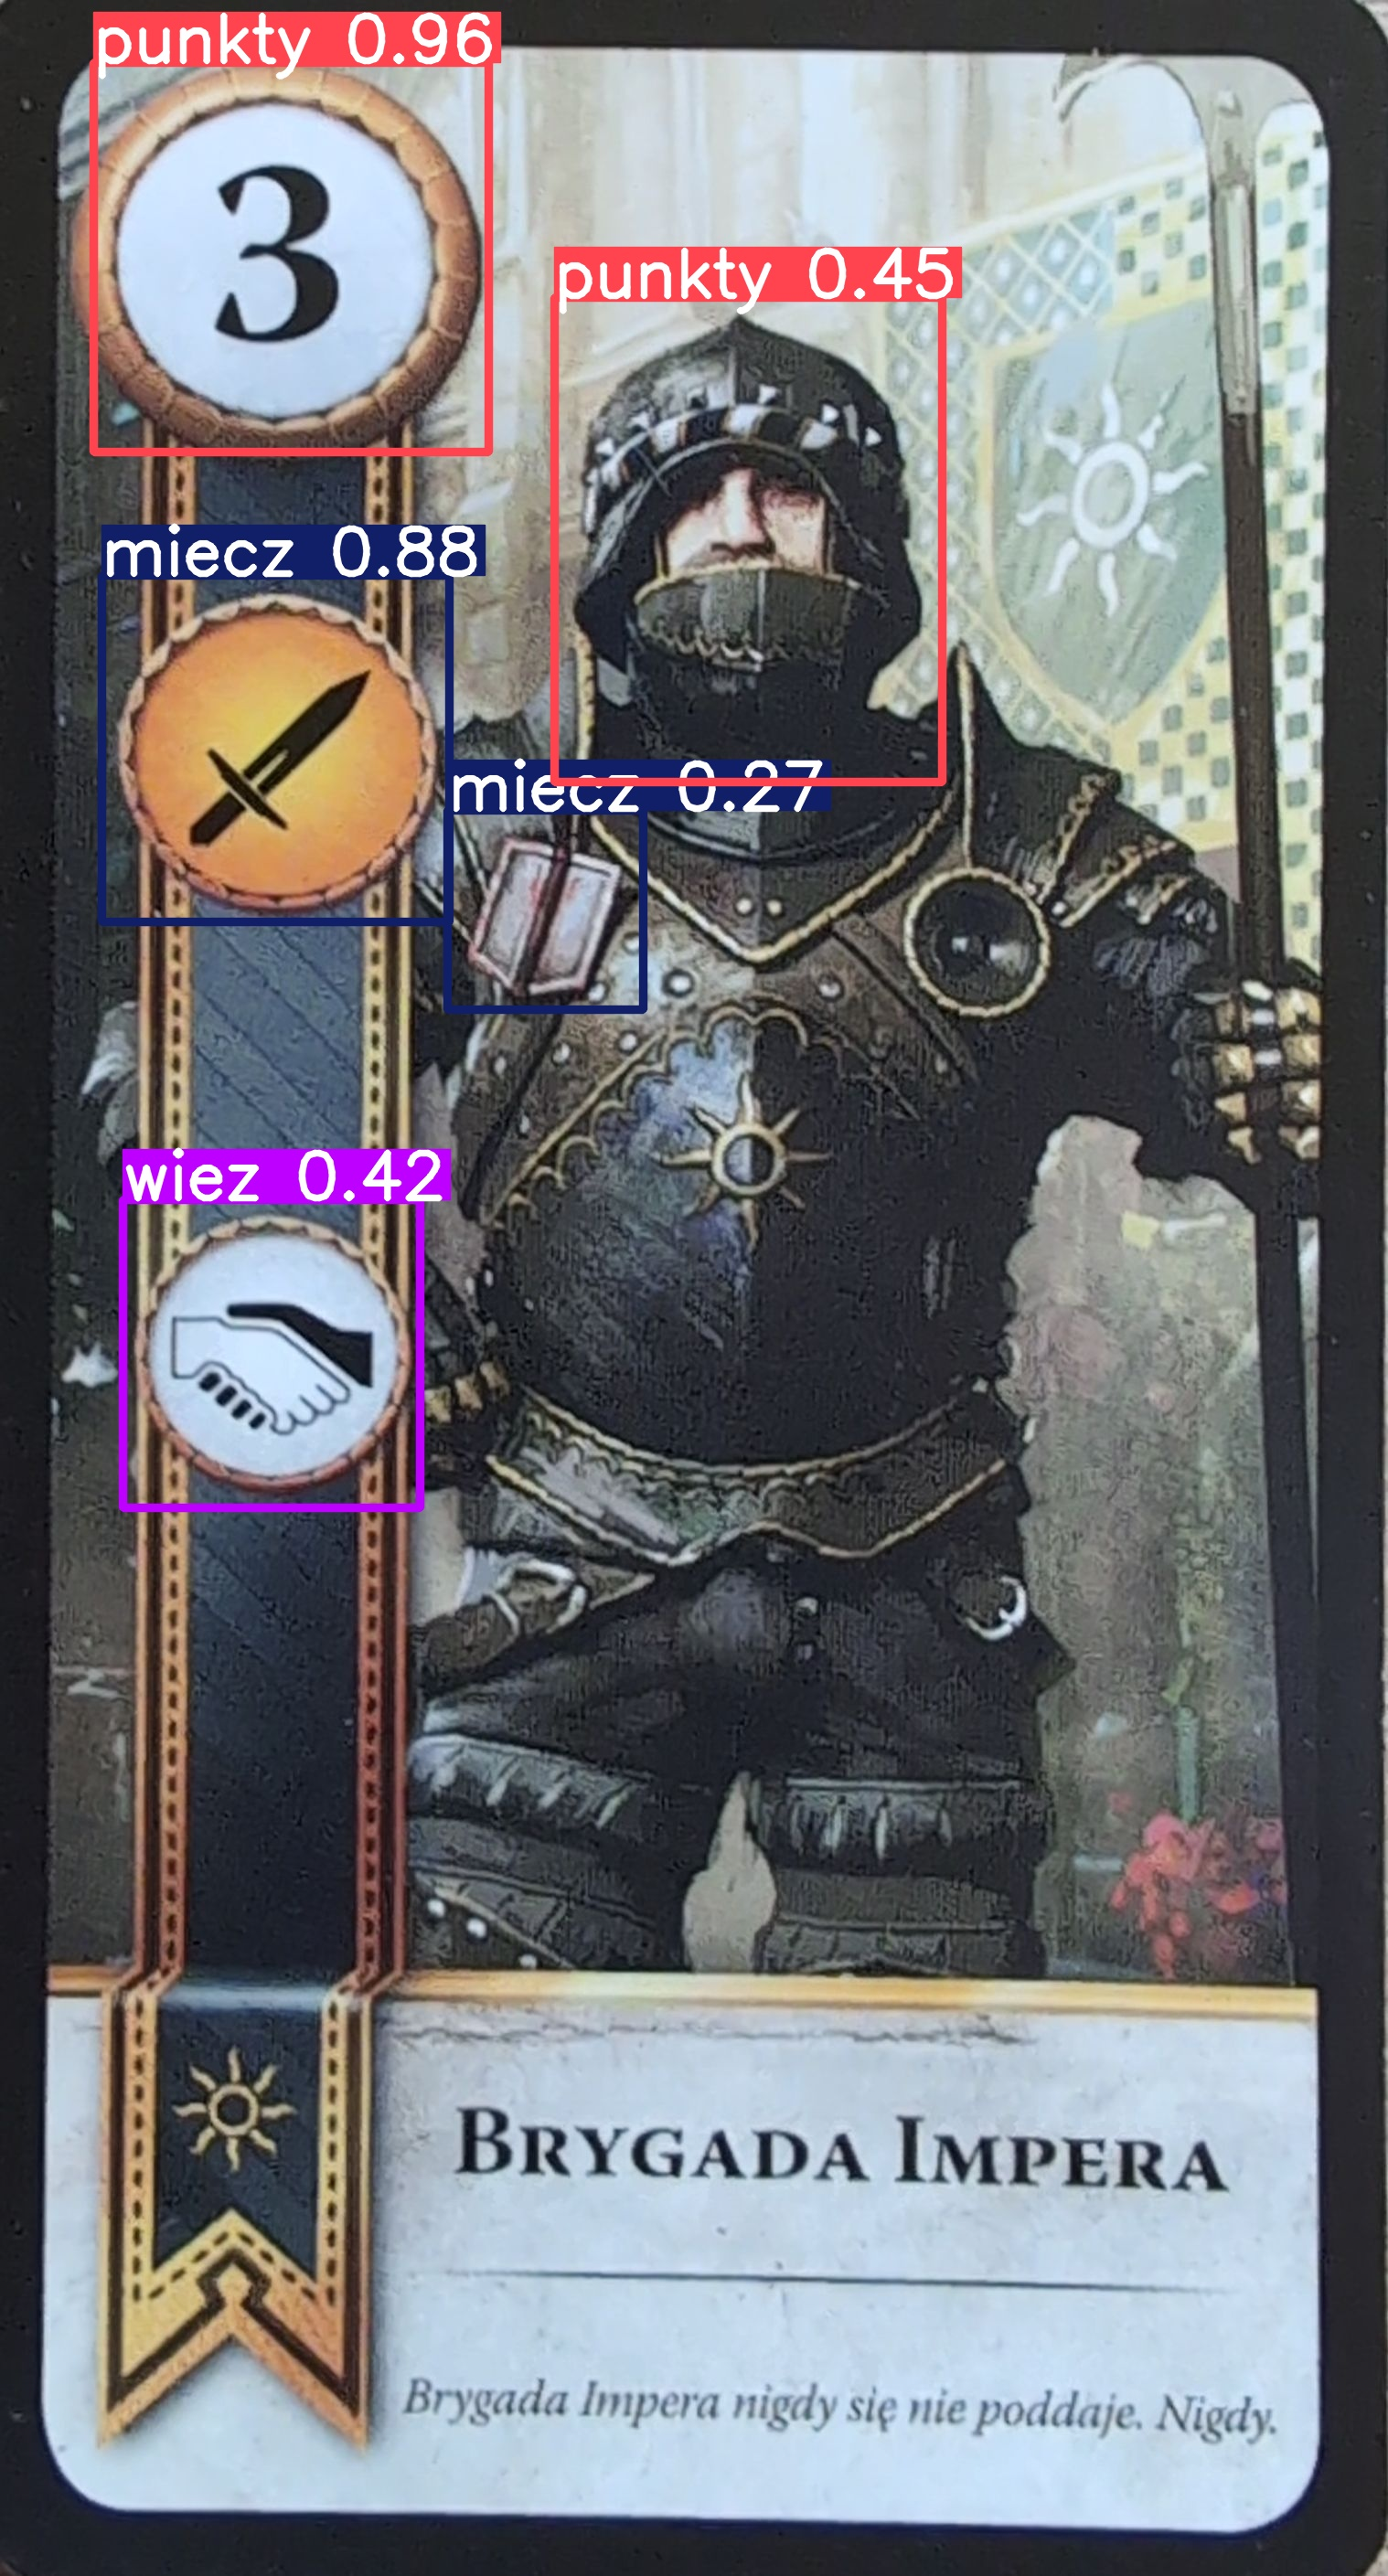

In [17]:
import glob
from IPython.display import Image, display
for image_path in glob.glob('runs/detect/predict3/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [ ]:
!mkdir /content/my_model
!cp /content/runs/detect/train3/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train3 /content/my_model

%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

mkdir: cannot create directory ‘/content/my_model’: File exists
/content/my_model
  adding: my_model.pt (deflated 10%)
updating: train/ (stored 0%)
updating: train/args.yaml (deflated 53%)
updating: train/weights/ (stored 0%)
/content
